In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import applications
from keras.layers import Activation, Dropout, Flatten, Dense,GlobalAveragePooling2D, BatchNormalization

In [ ]:

import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/120dog breeds-299.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/projectDataset299')

In [ ]:
import pathlib
from keras.preprocessing.image import ImageDataGenerator


data_dir = pathlib.Path('/content/projectDataset299/120dog breeds-299')

data_train = data_dir / 'train'

test_dir = data_dir / 'test'


labels_csv = pd.read_csv('/content/drive/MyDrive/labels.csv')
labels_csv['id'] = [str(fname) + '.jpg' for fname in labels_csv['id']]

In [ ]:
batch_size = 16
img_size = 299

In [ ]:
datagen = ImageDataGenerator(preprocessing_function = keras.applications.inception_v3.preprocess_input, validation_split=0.2)
train_generator = datagen.flow_from_dataframe(
                        dataframe = labels_csv,
                        directory = data_train,
                        subset='training',
                        x_col='id',
                        y_col='breed',
                        batch_size=batch_size,
                        shuffle=True,
                        class_mode='sparse',
                        color_mode='rgb',
                        target_size=(img_size, img_size))

validation_generator = datagen.flow_from_dataframe(
                        dataframe = labels_csv,
                        directory = data_train,
                        subset='validation',
                        x_col='id',
                        y_col='breed',
                        batch_size=batch_size,
                        shuffle=True,
                        class_mode='sparse',
                        color_mode='rgb',
                        target_size=(img_size, img_size))

Found 8178 validated image filenames belonging to 120 classes.
Found 2044 validated image filenames belonging to 120 classes.


In [ ]:
base = applications.inception_v3.InceptionV3(include_top=False, weights='imagenet',input_shape=(224,224,3))

for layer in base.layers:
    layer.trainable=False

model = Sequential()
model.add(base)
model.add(BatchNormalization())
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(120, activation='softmax'))
model.summary()

optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

87910968/87910968 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 batch_normalization_94 (Bat  (None, 5, 5, 2048)       8192      
 chNormalization)                                                
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                         

In [ ]:
history_inc = model.fit(train_generator, epochs=50, verbose = 1,
                        validation_data=validation_generator)

Epoch 1/50
512/512 [==============================] - 67s 100ms/step - loss: 2.7054 - accuracy: 0.4714 - val_loss: 0.7063 - val_accuracy: 0.8625
Epoch 2/50
512/512 [==============================] - 46s 90ms/step - loss: 0.7938 - accuracy: 0.8184 - val_loss: 0.4051 - val_accuracy: 0.8811
Epoch 3/50
512/512 [==============================] - 48s 94ms/step - loss: 0.5193 - accuracy: 0.8591 - val_loss: 0.3571 - val_accuracy: 0.8899
Epoch 4/50
512/512 [==============================] - 47s 92ms/step - loss: 0.4229 - accuracy: 0.8781 - val_loss: 0.3448 - val_accuracy: 0.8933
Epoch 5/50
512/512 [==============================] - 47s 92ms/step - loss: 0.3736 - accuracy: 0.8843 - val_loss: 0.3401 - val_accuracy: 0.8929
Epoch 6/50
512/512 [==============================] - 48s 94ms/step - loss: 0.3349 - accuracy: 0.8952 - val_loss: 0.3326 - val_accuracy: 0.8963
Epoch 7/50
512/512 [==============================] - 47s 92ms/step - loss: 0.3049 - accuracy: 0.9021 - val_loss: 0.3433 - val_accuracy

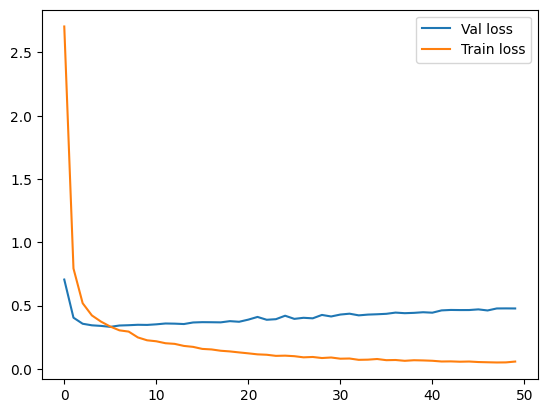

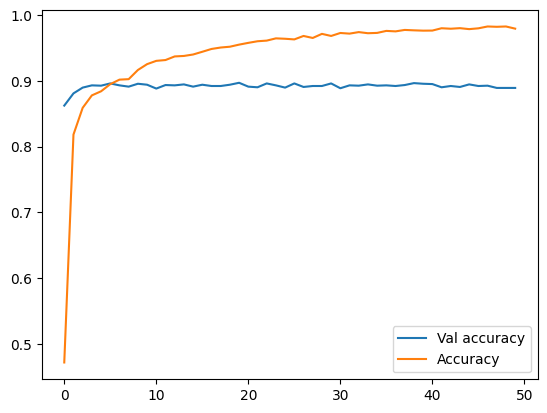

In [ ]:
plt.figure()
plt.plot(history_inc .history['val_loss'], label = 'Val loss')
plt.plot(history_inc .history['loss'], label = 'Train loss')
plt.legend()
plt.show()
plt.figure()
plt.plot(history_inc .history['val_accuracy'], label = 'Val accuracy')
plt.plot(history_inc .history['accuracy'], label = 'Accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/InceptionV3_version0_Epoch50.h5')